<h1>Task 3: Linear Regression</h1>

<h2>Objective: Implement and understand simple & multiple linear regression.<br>
Tools: Scikit-learn, Pandas, Matplotlib</h2>

<h3>Task to be performed:</h3>
<ol>
<li>Import and preprocess the dataset.
<li>Split data into train-test sets.
<li>Fit a Linear Regression model using sklearn.linear_
<li>Evaluate model using MAE, MSE, R².
<li>Plot regression line and interpret coefficients.
</ol>

<h3>Dataset:- House Price Prediction Dataset downloaded from Kaggle </h3>

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

<h5>T-1:- Import and preprocess the dataset.</h5>

In [2]:
# Load the dataset
df = pd.read_csv("Housing.csv")

In [3]:
# Display structure
print("Initial Columns:", df.columns)
print(df.info())

Initial Columns: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstat

In [4]:
# Encode categorical features (if any)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [5]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
# Standardize numeric features
scaler = StandardScaler()
X = df.drop("price", axis=1)  # Features
y = df["price"]               # Target

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

<h5>T-2:- Split data into train-test sets.</h5>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h5>T-3:- Fit a Linear Regression model using sklearn.linear_model.</h5>

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h5>T-4:- Evaluate model using MAE, MSE, R².</h5>

In [11]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nEvaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")


Evaluation Metrics:
MAE: 979679.69
MSE: 1771751116594.04
R²: 0.6495


<h5>T-5:- Plot regression line and interpret coefficients.</h5>

In [12]:
# Let's pick the feature most correlated with price
corr_matrix = df.corr()
top_feature = corr_matrix['price'].drop('price').abs().idxmax()
print(f"\nTop correlated feature: {top_feature}")


Top correlated feature: area


In [13]:
# Refit a simple regression model on that one feature
X_single = X_scaled[[top_feature]]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y, test_size=0.2, random_state=42)
simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)
y_pred_s = simple_model.predict(X_test_s)

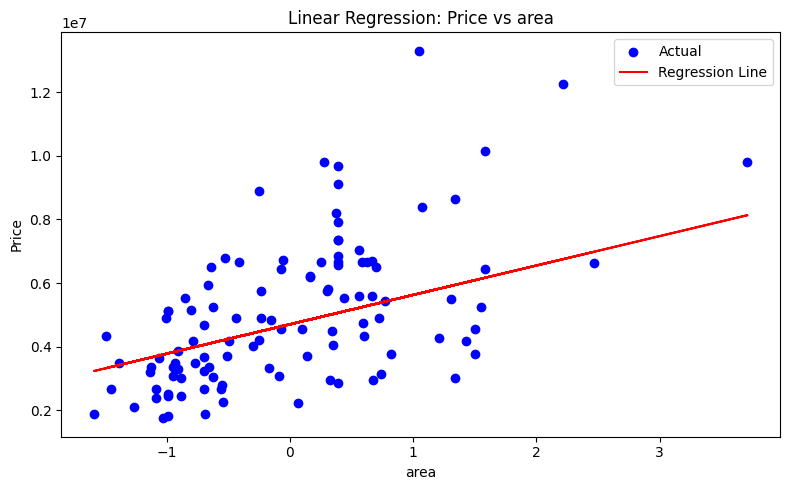

In [14]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Regression Line')
plt.xlabel(top_feature)
plt.ylabel("Price")
plt.title(f"Linear Regression: Price vs {top_feature}")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
# Interpret Coefficients
print("\nCoefficients of the full model:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")


Coefficients of the full model:
area: 511355.3149
bedrooms: 57939.7642
bathrooms: 550762.1087
stories: 352072.0863
mainroad: 127770.2536
guestroom: 89178.0079
basement: 187581.8844
hotwaterheating: 143909.2415
airconditioning: 365086.9339
parking: 194330.0653
prefarea: 267023.3644
furnishingstatus: -160043.5844
